### Import

In [1]:
from qutip import *
from qutip.operators import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from cython import *
from sympy import lambdify

### without RWA

In [2]:
Eq = 1
f = 0.05
def Hq():
    return Eq/2 *sigmaz()
def Hf():
    return f*sigmax()
def collapse_list():
    return []
Hf_time_coeff = "0.5*(tanh((t-a)/st) - tanh((t-b)/st))*cos(w*t + phase1) + 0.5*(tanh((t-a2)/st) - tanh((t-b2)/st))*cos(w*t + phase2)"
a = 33
b = 66
st = 0.001
phase1 = np.pi
phase2 = -np.pi/2
a2 = 70
b2 = 81.895
args = {'w':Eq, 'phase1':phase1, 'phase2':phase2,'a':a,'b':b,'st':st,'a2':a2,'b2':b2}
maxtime = 110
points = 10000
tlist = np.linspace(0,110,10000)
psi0 = (basis(2,0) + basis(2,1))/(2**0.5)

def Hq_t():
    return [Hq(),[Hf(),Hf_time_coeff]]

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


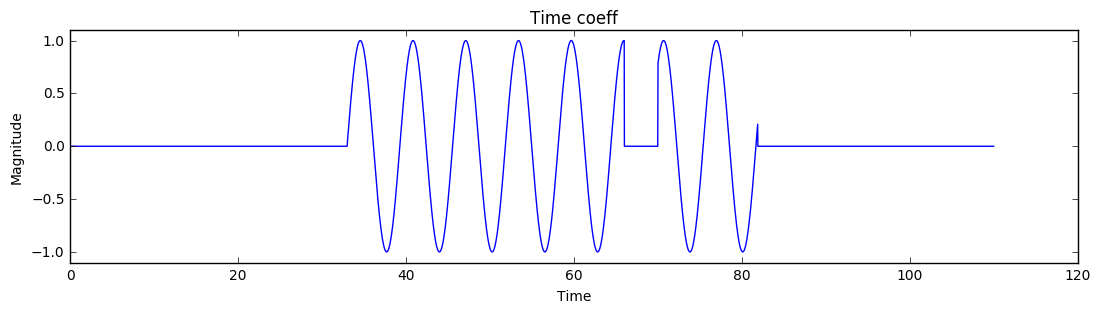

In [3]:
time_c_func = lambdify({'a','b','st','t','w','phase1','phase2','a2','b2'},Hf_time_coeff,'numpy')
fig, ax = plt.subplots(1,1, figsize=(13,3))
ax.set_title('Time coeff');
ax.plot(tlist, time_c_func(a=a,b=b,st=st,t=tlist,w=Eq,phase1=phase1,phase2=phase2,a2=a2,b2=b2))
ax.set_ylim(-1.1,1.1)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Magnitude');

In [4]:
expected = [Hq()]
def solve(expected_ops = expected, with_progress_bar = True):
    if with_progress_bar:
        return mesolve(Hq_t(), psi0, tlist, collapse_list(), expected_ops, args = args,options= Options(nsteps=10000), progress_bar=True)
    else:
        return mesolve(Hq_t(), psi0, tlist, collapse_list(), expected_ops, args = args,options= Options(nsteps=10000))

In [88]:
expected = [Hq()]
evecs = [basis(2,0),basis(2,1)]
for i in range(len(evecs)):
    expected.append(evecs[i]*evecs[i].dag())
    
output = solve(expected)
type(output.expect[1])

10.0%. Run time:   0.35s. Est. time left: 00:00:00:03
20.0%. Run time:   0.73s. Est. time left: 00:00:00:02
30.0%. Run time:   1.11s. Est. time left: 00:00:00:02
40.0%. Run time:   1.48s. Est. time left: 00:00:00:02
50.0%. Run time:   1.86s. Est. time left: 00:00:00:01
60.0%. Run time:   2.24s. Est. time left: 00:00:00:01
70.0%. Run time:   2.62s. Est. time left: 00:00:00:01
80.0%. Run time:   3.08s. Est. time left: 00:00:00:00
90.0%. Run time:   3.45s. Est. time left: 00:00:00:00
Total run time:   3.83s


numpy.ndarray

In [5]:
def find_time_1st(result_occupation):
    evecs = [basis(2,0),basis(2,1)]
    for i in range(len(evecs)):
        expected.append(evecs[i]*evecs[i].dag())
    res = solve(expected).expect[1][70:-1]
    print(res[7445])
    res = abs(res-result_occupation)
    print ()
    return res.argmin()
def find_result_occupation(t2):
    b2 = t2
    evecs = [basis(2,0),basis(2,1)]
    for i in range(len(evecs)):
        expected.append(evecs[i]*evecs[i].dag())
    return solve(expected,False).expect[1][-1]

In [ ]:
results = open('result_occupations.txt','w')
b2list = np.linspace(a2,111,1000)
for b2_id,b2 in enumerate(b2list):
    if b2_id % 10 == 0:
        print(b2_id)
    print("%d %d\n"%(find_result_occupation(b2),b2-a2), file=results)
    

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [92]:
oldoutput = output

0.788930315042


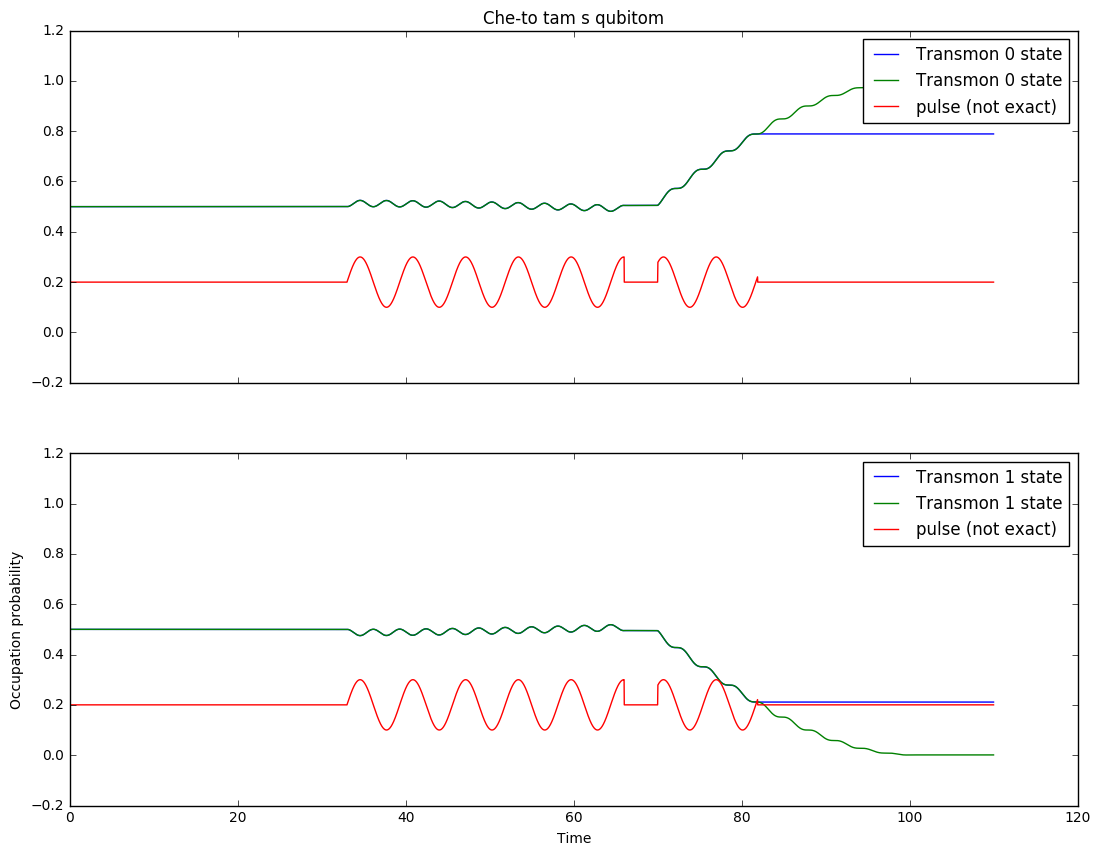

In [89]:
fig, axes = plt.subplots(2,1, figsize=(13,10), sharex=True)
axes[0].set_title('Che-to tam s qubitom');
for idx, ax in enumerate(axes):
    ax.plot(tlist, output.expect[1+idx], label="Transmon %i state"%idx)
    ax.plot(tlist, oldoutput.expect[1+idx], label="Transmon %i state"%idx)
    ax.plot(tlist, 0.2+ 0.1*time_c_func(a=a,b=b,st=st,t=tlist,w=Eq,phase1=phase1,phase2=phase2,a2=a2,b2=b2),label="pulse (not exact)")
    ax.set_ylim(-0.2,1.2)
    ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
print(output.expect[1][-1])